In [1]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [5]:
config = {}

config['camera'] = "07"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"

## experiment 1
config['date1'] = "2024-05-02"
config['date2'] = "2024-05-20"


In [24]:
mlti = __load_mlti(config['date1'], config['date2'], "V", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [25]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [26]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-05-02
2024-05-03
2024-05-04
2024-05-05
2024-05-06
2024-05-07
2024-05-08
2024-05-09
2024-05-10
2024-05-11
2024-05-12
2024-05-13
2024-05-14
2024-05-15
2024-05-16
2024-05-17
2024-05-18
2024-05-19
2024-05-20


In [27]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-05-02T16:13:04.000000Z,456.790116,474.039990,456.0,474.0,258.386466,150.080872,155.283209,-0.011592,10.465463,0.000601,0.000644,0.001783,0.000764,0.000715,0.000011,0.000088,0.0
1,2024-05-02T16:15:04.000000Z,456.815016,474.051552,456.0,474.0,258.285892,150.054728,155.272272,-0.008107,10.548987,0.000607,0.000650,0.001799,0.000771,0.000721,0.000012,0.000088,120.0
2,2024-05-02T16:16:04.000000Z,456.838966,474.043067,456.0,474.0,258.225539,150.041113,155.277663,-0.007309,10.496389,0.000607,0.000650,0.001799,0.000772,0.000722,0.000011,0.000088,180.0
3,2024-05-02T16:21:04.000000Z,456.847528,474.066111,456.0,474.0,258.420501,150.014760,155.229623,-0.002753,10.161807,0.000603,0.000646,0.001791,0.000766,0.000717,0.000011,0.000088,480.0
4,2024-05-02T16:21:22.000000Z,456.841093,474.081298,456.0,474.0,258.571524,149.983092,155.201938,-0.002681,9.875969,0.000605,0.000648,0.001799,0.000769,0.000719,0.000011,0.000088,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2024-05-20T23:26:04.000000Z,513.181891,482.436821,513.0,482.0,334.096204,298.705515,312.532801,-0.123844,-7.042754,0.008279,0.009656,0.015729,0.029704,0.030979,0.000026,0.013908,1581180.0
2615,2024-05-20T23:28:03.000000Z,513.185219,482.440256,513.0,482.0,334.339667,312.695812,298.859019,-1.694424,-7.256860,0.008285,0.009665,0.015770,0.031046,0.029766,0.000026,0.013965,1581299.0
2616,2024-05-20T23:31:04.000000Z,513.190973,482.469981,513.0,482.0,333.845728,298.560042,312.408812,-0.123858,-6.828319,0.008273,0.009651,0.015690,0.029648,0.030913,0.000026,0.013852,1581480.0
2617,2024-05-20T23:46:04.000000Z,513.243160,482.521168,513.0,482.0,333.535054,298.218679,312.085571,-0.123333,-6.546039,0.008257,0.009633,0.015619,0.029507,0.030751,0.000025,0.013742,1582380.0


### Remove MLTI times

In [28]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


In [29]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan
0,2024-05-02T16:13:04.000000Z,2.420988,2.512412,2.4168,2.5122,258.386466,150.080872,155.283209,-0.011592,10.465463,...,0.000644,0.001783,0.000764,0.000715,0.000011,0.000088,0.0,2024-05-02T15:13:04.000000Z,NaN,NaN
1,2024-05-02T16:15:04.000000Z,2.421120,2.512473,2.4168,2.5122,258.285892,150.054728,155.272272,-0.008107,10.548987,...,0.000650,0.001799,0.000771,0.000721,0.000012,0.000088,120.0,2024-05-02T15:15:04.000000Z,NaN,NaN
2,2024-05-02T16:16:04.000000Z,2.421247,2.512428,2.4168,2.5122,258.225539,150.041113,155.277663,-0.007309,10.496389,...,0.000650,0.001799,0.000772,0.000722,0.000011,0.000088,180.0,2024-05-02T15:16:04.000000Z,NaN,NaN
3,2024-05-02T16:21:04.000000Z,2.421292,2.512550,2.4168,2.5122,258.420501,150.014760,155.229623,-0.002753,10.161807,...,0.000646,0.001791,0.000766,0.000717,0.000011,0.000088,480.0,2024-05-02T15:21:04.000000Z,NaN,NaN
4,2024-05-02T16:21:22.000000Z,2.421258,2.512631,2.4168,2.5122,258.571524,149.983092,155.201938,-0.002681,9.875969,...,0.000648,0.001799,0.000769,0.000719,0.000011,0.000088,498.0,2024-05-02T15:21:22.000000Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2024-05-20T23:26:04.000000Z,2.719864,2.556915,2.7189,2.5546,334.096204,298.705515,312.532801,-0.123844,-7.042754,...,0.009656,0.015729,0.029704,0.030979,0.000026,0.013908,1581180.0,2024-05-20T22:26:04.000000Z,2.5546,2.7189
2615,2024-05-20T23:28:03.000000Z,2.719882,2.556933,2.7189,2.5546,334.339667,312.695812,298.859019,-1.694424,-7.256860,...,0.009665,0.015770,0.031046,0.029766,0.000026,0.013965,1581299.0,2024-05-20T22:28:03.000000Z,2.5546,2.7189
2616,2024-05-20T23:31:04.000000Z,2.719912,2.557091,2.7189,2.5546,333.845728,298.560042,312.408812,-0.123858,-6.828319,...,0.009651,0.015690,0.029648,0.030913,0.000026,0.013852,1581480.0,2024-05-20T22:31:04.000000Z,2.5546,2.7189
2617,2024-05-20T23:46:04.000000Z,2.720189,2.557362,2.7189,2.5546,333.535054,298.218679,312.085571,-0.123333,-6.546039,...,0.009633,0.015619,0.029507,0.030751,0.000025,0.013742,1582380.0,2024-05-20T22:46:04.000000Z,2.5546,2.7189


### Remove artefacts

In [30]:
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 50]

### Plotting

In [31]:
from functions.reduce import __reduce

In [32]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

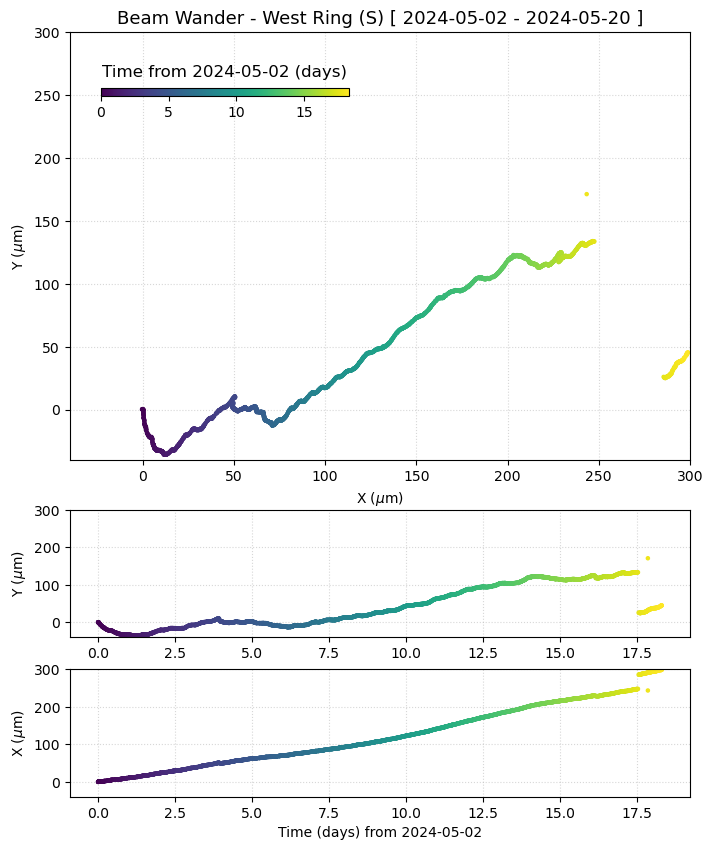

In [33]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -40, 300
    y1, y2 = -40, 300
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(y1, y2)
    ax2.set_ylim(y1, y2)
    ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - West Ring (S) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RV_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


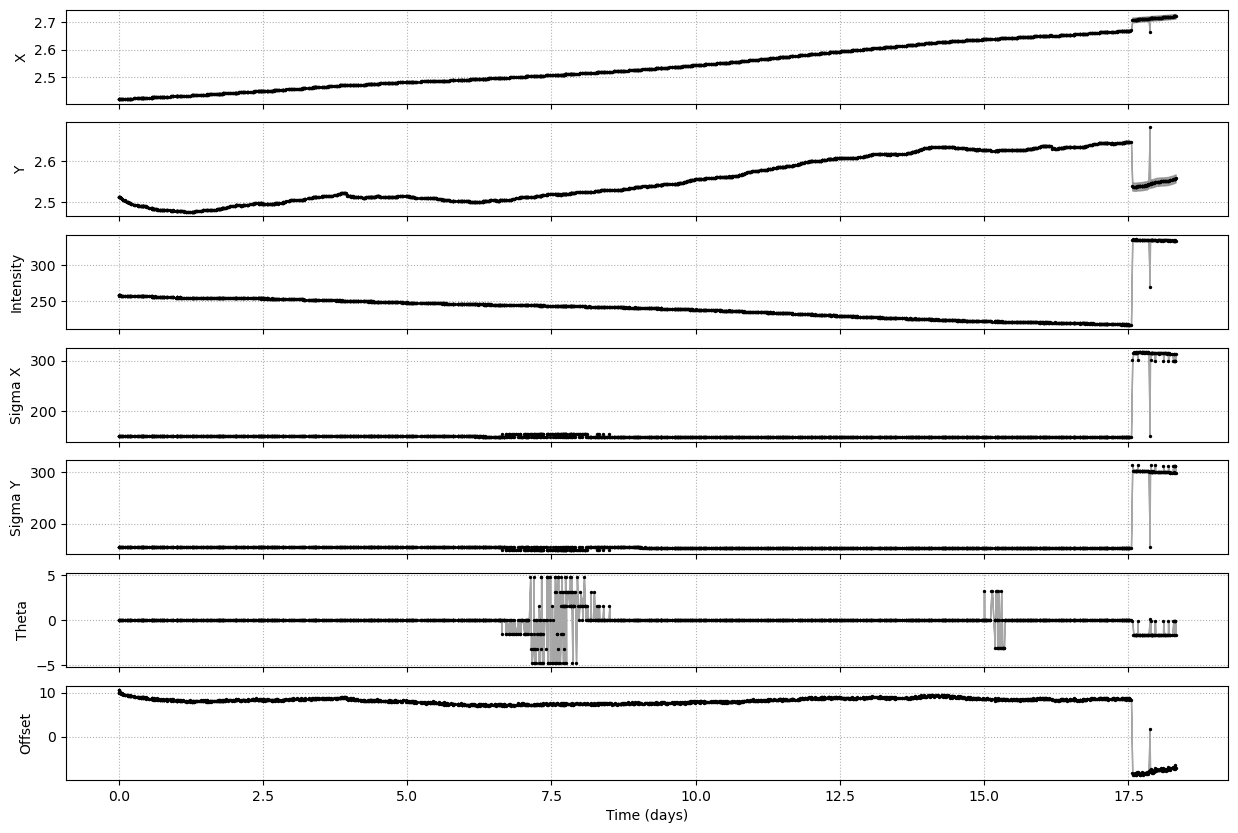

In [34]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')
